In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import mccd
from astropy.io import fits

%pylab inline

print(tf.__version__)




runstats and/or skimage could not be imported because not installed
Populating the interactive namespace from numpy and matplotlib
2.4.4


In [2]:
import scipy


In [3]:

SNR_path = '/home/tliaudat/github/aziz_repos/deep_mccd/data/realistic_dataset_input/full_SNR.npy'

SNR_data = np.load(SNR_path, allow_pickle=True)


In [4]:
SNR_data.shape

(535417,)

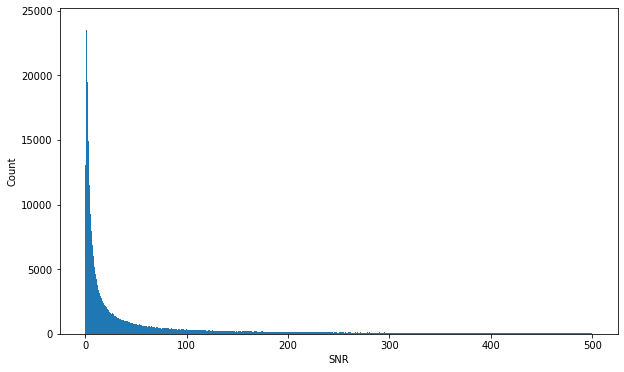

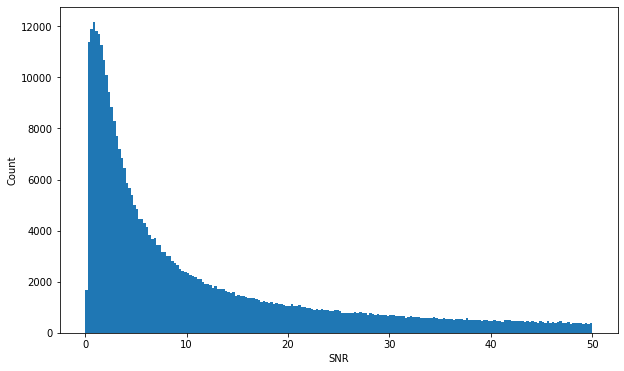

In [8]:

figure(figsize=(10,6))
_ = plt.hist(SNR_data, bins=1000, range=(0, 500))
plt.xlabel('SNR')
plt.ylabel('Count')
show()

figure(figsize=(10,6))
_ = plt.hist(SNR_data, bins=200, range=(0, 50))
plt.xlabel('SNR')
plt.ylabel('Count')
show()




In [10]:

fwhm_dist_path = '/home/tliaudat/github/aziz_repos/deep_mccd/data/realistic_dataset_input/seeing_distribution.npy'
fwhm_dist = np.load(fwhm_dist_path, allow_pickle=True)[()]


In [27]:
# Create distribution
hist = np.histogram(SNR_data, bins=1000, range=[0, 500])
hist_dist = scipy.stats.rv_histogram(hist)
save_path = '/home/tliaudat/github/aziz_repos/deep_mccd/data/realistic_dataset_input/SNR_dist.npy'
np.save(save_path, hist_dist, allow_pickle=True) 


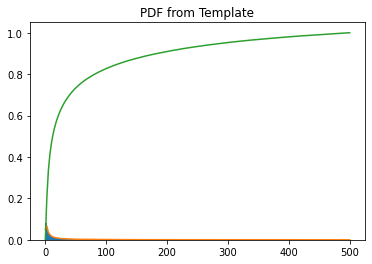

In [42]:

X = np.linspace(0., 500.0, 200)

plt.title("PDF from Template")
plt.hist(SNR_data, density=True, bins=200, range=[0, 500])
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.show()


In [41]:

new_SNR = hist_dist.ppf(np.random.rand(1))
new_SNR


array([442.08952644])

In [38]:

loaded_dist = np.load(save_path, allow_pickle=True)[()]


In [39]:
loaded_dist
